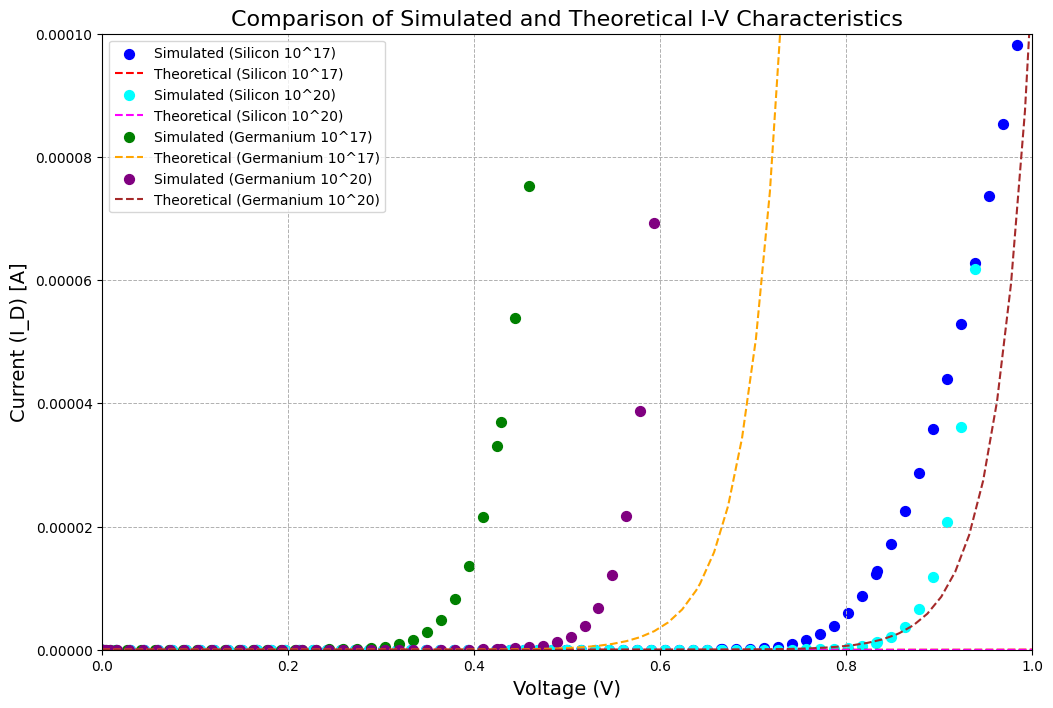

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
q = 1.602e-19  # Charge of electron (C)
k = 1.381e-23  # Boltzmann constant (J/K)
T = 300  # Temperature in Kelvin
n = 1.5  # Ideality factor
A = 4e-8  # Diode area in cm^2


# Material properties for Silicon (doping levels 10^17 and 10^20)
n_i_si = 1.5e10  # Intrinsic carrier concentration for Silicon (cm^-3)
mu_n_si = 1350   # Electron mobility for Silicon (cm^2/Vs)
mu_p_si = 480    # Hole mobility for Silicon (cm^2/Vs)
tau_n_si = 1e-6  # Electron lifetime for Silicon (s)
tau_p_si = 1e-6  # Hole lifetime for Silicon (s)
N_D_si_17 = 1e17  # Donor concentration for Silicon (10^17)
N_A_si_17 = 1e17  # Acceptor concentration for Silicon (10^17)
N_D_si_20 = 1e20  # Donor concentration for Silicon (10^20)
N_A_si_20 = 1e20  # Acceptor concentration for Silicon (10^20)

# Material properties for Germanium (doping levels 10^17 and 10^20)
n_i_ge = 2.5e13  # Intrinsic carrier concentration for Germanium (cm^-3)
mu_n_ge = 3900   # Electron mobility for Germanium (cm^2/Vs)
mu_p_ge = 1900   # Hole mobility for Germanium (cm^2/Vs)
tau_n_ge = 1e-6  # Electron lifetime for Germanium (s)
tau_p_ge = 1e-6  # Hole lifetime for Germanium (s)
N_D_ge_17 = 1e17  # Donor concentration for Germanium (10^17)
N_A_ge_17 = 1e17  # Acceptor concentration for Germanium (10^17)
N_D_ge_20 = 1e20  # Donor concentration for Germanium (10^20)
N_A_ge_20 = 1e20  # Acceptor concentration for Germanium (10^20)

# Function to calculate diffusion coefficient and length
def calculate_diffusion_params(mu, tau, T):
    D = mu * k * T / q  # Diffusion coefficient (cm^2/s)
    L = np.sqrt(D * tau)  # Diffusion length (cm)
    return D, L

# Function to calculate saturation current using doping levels
def calculate_is(n_i, mu_n, mu_p, tau_n, tau_p, A, T, N_A, N_D):
    # Calculate diffusion constants and lengths for electrons and holes
    D_n, L_n = calculate_diffusion_params(mu_n, tau_n, T)
    D_p, L_p = calculate_diffusion_params(mu_p, tau_p, T)

    # Calculate I_S using diffusion length, coefficient, and doping concentrations
    I_S = q * A * n_i**2 * ((D_n / (N_A * L_n)) + (D_p / (N_D * L_p)))
    return I_S

# Calculate saturation currents for Silicon and Germanium at both doping levels
I_S_si_17 = calculate_is(n_i_si, mu_n_si, mu_p_si, tau_n_si, tau_p_si, A, T, N_A_si_17, N_D_si_17)
I_S_si_20 = calculate_is(n_i_si, mu_n_si, mu_p_si, tau_n_si, tau_p_si, A, T, N_A_si_20, N_D_si_20)
I_S_ge_17 = calculate_is(n_i_ge, mu_n_ge, mu_p_ge, tau_n_ge, tau_p_ge, A, T, N_A_ge_17, N_D_ge_17)
I_S_ge_20 = calculate_is(n_i_ge, mu_n_ge, mu_p_ge, tau_n_ge, tau_p_ge, A, T, N_A_ge_20, N_D_ge_20)

# Load the simulated data from CSV
data = pd.read_csv('diode.csv')

# Extract columns for each doping level and material
V_D_si_17 = data['Si_17 X']
I_D_si_sim_17 = data['Si_17 Y']
V_D_si_20 = data['Si_20 X']
I_D_si_sim_20 = data['Si_20 Y']
V_D_ge_17 = data['Ge_17 X']
I_D_ge_sim_17 = data['Ge_17 Y']
V_D_ge_20 = data['Ge_20 X']
I_D_ge_sim_20 = data['Ge_20 Y']

# Function to calculate theoretical diode current
def theoretical_current(V_D, I_S, n, T):
    exponent = (q * V_D) / (n * k * T)
    I_D = I_S * (np.exp(exponent) - 1)
    return I_D

# Calculate theoretical currents for each doping level and material
I_D_si_theory_17 = theoretical_current(V_D_si_17, I_S_si_17, n, T)
I_D_si_theory_20 = theoretical_current(V_D_si_20, I_S_si_20, n, T)
I_D_ge_theory_17 = theoretical_current(V_D_ge_17, I_S_ge_17, n, T)
I_D_ge_theory_20 = theoretical_current(V_D_ge_20, I_S_ge_20, n, T)

# Plotting the results
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the simulated and theoretical data for Silicon (10^17 doping)
ax.scatter(V_D_si_17, I_D_si_sim_17, label='Simulated (Silicon 10^17)', color='blue', s=50)
ax.plot(V_D_si_17, I_D_si_theory_17, '--', label='Theoretical (Silicon 10^17)', color='red')

# Plotting the simulated and theoretical data for Silicon (10^20 doping)
ax.scatter(V_D_si_20, I_D_si_sim_20, label='Simulated (Silicon 10^20)', color='cyan', s=50)
ax.plot(V_D_si_20, I_D_si_theory_20, '--', label='Theoretical (Silicon 10^20)', color='magenta')

# Plotting the simulated and theoretical data for Germanium (10^17 doping)
ax.scatter(V_D_ge_17, I_D_ge_sim_17, label='Simulated (Germanium 10^17)', color='green', s=50)
ax.plot(V_D_ge_17, I_D_ge_theory_17, '--', label='Theoretical (Germanium 10^17)', color='orange')

# Plotting the simulated and theoretical data for Germanium (10^20 doping)
ax.scatter(V_D_ge_20, I_D_ge_sim_20, label='Simulated (Germanium 10^20)', color='purple', s=50)
ax.plot(V_D_ge_20, I_D_ge_theory_20, '--', label='Theoretical (Germanium 10^20)', color='brown')

# Set a linear y-axis scale and y-axis limit
plt.yscale('linear')
plt.ylim(0, 0.0001)

plt.xscale('linear')
plt.xlim(0, 1.0)

# Labels and title
ax.set_xlabel('Voltage (V)', fontsize=14)
ax.set_ylabel('Current (I_D) [A]', fontsize=14)
ax.set_title('Comparison of Simulated and Theoretical I-V Characteristics', fontsize=16)
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.7)

# Show the plot
plt.show()

print()